In [1]:
from functions.utils import *
import warnings

warnings.filterwarnings('ignore')

In [2]:
lots = load_data(path='../donnees/lots_cleaned.csv')

In [3]:
lots

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,contractorSme,numberTendersSme,subContracted,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration
0,0,2010142,0,0,2009-09-24,100000.0,8.916747e+05,45233226.0,2.0,N,...,N,1.0,N,Y,N,W,OPE,Y,24.00,42.0
1,1,2010142,0,0,2009-09-24,100000.0,1.169251e+05,45233226.0,2.0,N,...,N,1.0,N,Y,N,W,OPE,Y,24.00,42.0
2,2,2010142,0,0,2009-09-24,100000.0,7.381412e+04,45233226.0,2.0,N,...,N,1.0,N,Y,N,W,OPE,Y,24.00,42.0
3,3,2010143,0,0,2009-09-28,100000.0,3.840584e+05,45232150.0,11.0,N,...,N,1.0,N,N,N,W,OPE,Y,24.00,42.0
4,4,2010144,0,0,2009-11-06,100000.0,7.790000e+06,45211000.0,6.0,N,...,N,1.0,N,N,N,W,RES,Y,24.01,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380960,1380960,2020643360,0,0,2020-12-28,100000.0,5.000000e+05,92200000.0,2.0,N,...,Y,1.0,N,Y,N,S,NIC,Y,96.00,35.0
1380961,1380961,2020643361,0,0,2020-12-10,100000.0,2.000000e+07,65111000.0,2.0,N,...,N,1.0,N,Y,N,S,NIC,Y,24.00,62.0
1380962,1380962,2020643362,0,0,2020-12-17,100000.0,4.984029e+06,85312110.0,3.0,N,...,N,1.0,N,Y,N,S,NIC,Y,60.00,35.0
1380963,1380963,2020643363,0,0,2020-12-11,497000000.0,4.970000e+08,65300000.0,1.0,N,...,N,1.0,N,Y,N,S,NOC,Y,24.00,42.0


In [4]:
lots.dtypes

lotId                    int64
tedCanId                 int64
correctionsNb            int64
cancelled                int64
awardDate               object
awardEstimatedPrice    float64
awardPrice             float64
cpv                    float64
numberTenders          float64
onBehalf                object
jointProcurement        object
fraAgreement            object
fraEstimated            object
lotsNumber               int64
accelerated             object
outOfDirectives          int64
contractorSme           object
numberTendersSme       float64
subContracted           object
gpa                     object
multipleCae             object
typeOfContract          object
topType                 object
renewal                 object
contractDuration       float64
publicityDuration      float64
dtype: object

# Question 1

Q1: peut-on identifier des classes de similarité d’agents économiques? Des lots?

In [5]:
numeric_columns = [
    'correctionsNb', 'awardEstimatedPrice', 'awardPrice', 'numberTenders', 
    'lotsNumber', 'numberTendersSme','contractDuration','publicityDuration'
]

In [6]:
categorical_columns = [
    'cancelled', 'year', 'cpv', 'onBehalf', 'jointProcurement', 
    'fraAgreement', 'fraEstimated', 'accelerated', 'outOfDirectives',
    'subContracted', 'gpa', 'multipleCae', 'typeOfContract', 'topType', 'renewal'
]

In [7]:
lots = get_awardDate_info(lots)

In [8]:
clusters_1 = load_data(path='../donnees/lots_cleaned_clusters.csv')

In [9]:
clusters_1

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,gpa,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration,year,month,cluster
0,0,2010142,0,0,2009-09-24,100000.0,8.916747e+05,45233226.0,2.0,N,...,Y,N,W,OPE,Y,24.00,42.0,2009,9,0
1,1,2010142,0,0,2009-09-24,100000.0,1.169251e+05,45233226.0,2.0,N,...,Y,N,W,OPE,Y,24.00,42.0,2009,9,0
2,2,2010142,0,0,2009-09-24,100000.0,7.381412e+04,45233226.0,2.0,N,...,Y,N,W,OPE,Y,24.00,42.0,2009,9,0
3,3,2010143,0,0,2009-09-28,100000.0,3.840584e+05,45232150.0,11.0,N,...,N,N,W,OPE,Y,24.00,42.0,2009,9,0
4,4,2010144,0,0,2009-11-06,100000.0,7.790000e+06,45211000.0,6.0,N,...,N,N,W,RES,Y,24.01,36.0,2009,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380960,1380960,2020643360,0,0,2020-12-28,100000.0,5.000000e+05,92200000.0,2.0,N,...,Y,N,S,NIC,Y,96.00,35.0,2020,12,6
1380961,1380961,2020643361,0,0,2020-12-10,100000.0,2.000000e+07,65111000.0,2.0,N,...,Y,N,S,NIC,Y,24.00,62.0,2020,12,0
1380962,1380962,2020643362,0,0,2020-12-17,100000.0,4.984029e+06,85312110.0,3.0,N,...,Y,N,S,NIC,Y,60.00,35.0,2020,12,6
1380963,1380963,2020643363,0,0,2020-12-11,497000000.0,4.970000e+08,65300000.0,1.0,N,...,Y,N,S,NOC,Y,24.00,42.0,2020,12,0


# Question 2

Q2: quelles sont les variables et valeurs qui permettent de distinguer ces classes et/ou qui sont caractéristiques de certaines classes?

In [10]:
cluster_1_corr_cat, cluster_1_corr_num = get_all_corr_cat(
    data = clusters_1, 
    col = 'cluster', 
    num_cols = numeric_columns, 
    cat_cols = categorical_columns
)

In [11]:
cluster_1_corr_cat.sort_values(by='cluster', ascending=False)

,cluster
fraAgreement,0.880786
renewal,0.303844
cpv,0.217361
typeOfContract,0.193174
outOfDirectives,0.145838
onBehalf,0.099392
jointProcurement,0.086178
multipleCae,0.085720
gpa,0.080407
fraEstimated,0.073149


In [12]:
cluster_1_corr_num

,cluster
correctionsNb,0.0
awardEstimatedPrice,0.0
awardPrice,0.0
numberTenders,0.0
lotsNumber,0.0
numberTendersSme,0.0
contractDuration,0.0
publicityDuration,0.0


# Question 3

Q3: comment interpréter ces classes, que signifient-elles?

In [13]:
fraAgreement_corr_data = get_corr_cat_2_cat_data(
    df = clusters_1, 
    xcol = 'cluster', 
    ycol = 'fraAgreement'
)

In [14]:
fraAgreement_corr_data

fraAgreement,N,Y
cluster,,
0,741354,0
1,10886,7490
2,3,0
3,367,31
4,48,5
5,4034,1145
6,142808,119140
7,2,0
8,0,353650


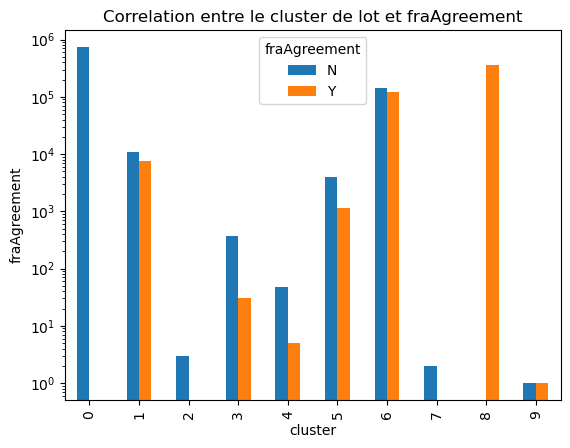

In [15]:
plot_categorial_categorical(
    data=fraAgreement_corr_data,
    title="Correlation entre le cluster de lot et fraAgreement",
    xlabel="cluster",
    ylabel="fraAgreement",
    saveas='../images/04_quest_lots_02.png',
    logy=True
)

# Question 4

Q4: y a-t-il des anomalies (lots ou agents)?

In [16]:
clusters_1_anomalies = detect_anomalies(
    data =clusters_1, 
    numeric_columns = numeric_columns, 
    categorical_columns = categorical_columns
)

In [17]:
clusters_1_anomalies

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration,year,month,cluster,anomaly
0,0,2010142,0,0,2009-09-24,100000.0,8.916747e+05,45233226.0,2.0,N,...,N,W,OPE,Y,24.00,42.0,2009,9,0,False
1,1,2010142,0,0,2009-09-24,100000.0,1.169251e+05,45233226.0,2.0,N,...,N,W,OPE,Y,24.00,42.0,2009,9,0,False
2,2,2010142,0,0,2009-09-24,100000.0,7.381412e+04,45233226.0,2.0,N,...,N,W,OPE,Y,24.00,42.0,2009,9,0,False
3,3,2010143,0,0,2009-09-28,100000.0,3.840584e+05,45232150.0,11.0,N,...,N,W,OPE,Y,24.00,42.0,2009,9,0,False
4,4,2010144,0,0,2009-11-06,100000.0,7.790000e+06,45211000.0,6.0,N,...,N,W,RES,Y,24.01,36.0,2009,11,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380960,1380960,2020643360,0,0,2020-12-28,100000.0,5.000000e+05,92200000.0,2.0,N,...,N,S,NIC,Y,96.00,35.0,2020,12,6,False
1380961,1380961,2020643361,0,0,2020-12-10,100000.0,2.000000e+07,65111000.0,2.0,N,...,N,S,NIC,Y,24.00,62.0,2020,12,0,False
1380962,1380962,2020643362,0,0,2020-12-17,100000.0,4.984029e+06,85312110.0,3.0,N,...,N,S,NIC,Y,60.00,35.0,2020,12,6,False
1380963,1380963,2020643363,0,0,2020-12-11,497000000.0,4.970000e+08,65300000.0,1.0,N,...,N,S,NOC,Y,24.00,42.0,2020,12,0,False


In [18]:
clusters_1_anomalies_corr_data = get_corr_cat_2_cat_data(
    df = clusters_1_anomalies, 
    xcol = 'cluster', 
    ycol = 'anomaly'
)

In [19]:
clusters_1_anomalies_corr_data

anomaly,False,True
cluster,,
0,741354,0
1,18349,27
2,3,0
3,349,49
4,41,12
5,5179,0
6,261948,0
7,2,0
8,353650,0


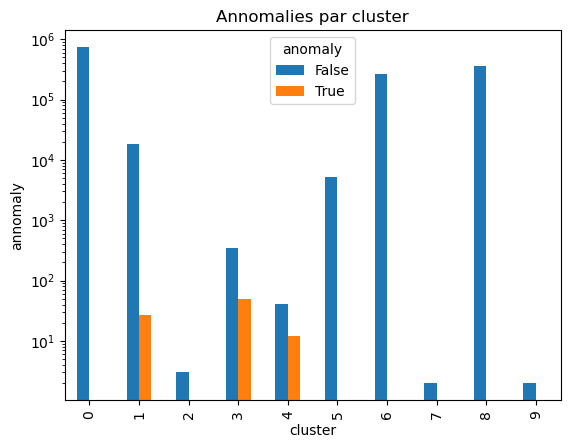

In [20]:
plot_categorial_categorical(
    data=clusters_1_anomalies_corr_data,
    title="Annomalies par cluster",
    xlabel="cluster",
    ylabel="annomaly",
    saveas='../images/04_quest_lots_03.png',
    logy=True
)

In [21]:
get_anomaly_cluster(
    data = clusters_1_anomalies, 
    clusterId = 1
)

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration,year,month,cluster,anomaly
951981,951981,2017257320,0,0,2017-05-22,100000.0,2750000.0,79400000.0,56.0,Y,...,Y,S,OPE,Y,48.00,39.0,2017,5,1,True
1237932,1237932,2019452719,0,0,2019-09-18,100000.0,162290.0,71240000.0,65.0,Y,...,Y,S,NIC,N,30.53,34.0,2019,9,1,True
1362875,1362875,2020554137,0,0,2020-10-13,100000.0,14160.0,80530000.0,57.0,Y,...,Y,S,OPE,N,24.00,59.0,2020,10,1,True
1362876,1362876,2020554137,0,0,2020-10-12,100000.0,31740.0,80530000.0,57.0,Y,...,Y,S,OPE,N,24.00,59.0,2020,10,1,True
1362877,1362877,2020554137,0,0,2020-10-12,100000.0,8120.0,80530000.0,57.0,Y,...,Y,S,OPE,N,24.00,59.0,2020,10,1,True
1362878,1362878,2020554137,0,0,2020-10-12,100000.0,49580.0,80530000.0,57.0,Y,...,Y,S,OPE,N,24.00,59.0,2020,10,1,True
1362879,1362879,2020554137,0,0,2020-10-06,100000.0,22140.0,80530000.0,57.0,Y,...,Y,S,OPE,N,24.00,59.0,2020,10,1,True
1362881,1362881,2020554137,0,0,2020-10-02,100000.0,27600.0,80530000.0,57.0,Y,...,Y,S,OPE,N,24.00,59.0,2020,10,1,True
1362882,1362882,2020554137,0,0,2020-10-02,100000.0,10860.0,80530000.0,57.0,Y,...,Y,S,OPE,N,24.00,59.0,2020,10,1,True
1362883,1362883,2020554137,0,0,2020-10-02,100000.0,53570.0,80530000.0,57.0,Y,...,Y,S,OPE,N,24.00,59.0,2020,10,1,True


In [22]:
get_anomaly_cluster(
    data = clusters_1_anomalies, 
    clusterId = 3
)

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration,year,month,cluster,anomaly
814773,814773,2016168239,0,0,2016-04-27,100000.0,8997001.00,45000000.0,29.0,N,...,N,W,RES,Y,32.00,33.0,2016,4,3,True
823770,823770,2016210074,0,0,2016-05-17,100000.0,447025.00,71420000.0,32.0,N,...,N,S,COD,Y,120.00,50.0,2016,5,3,True
840776,840776,2016280554,0,0,2016-08-09,250000.0,287839.09,71000000.0,63.0,N,...,N,S,RES,N,24.00,42.0,2016,8,3,True
845530,845530,2016302100,0,0,2016-04-12,100000.0,545100.00,71000000.0,6.0,N,...,N,S,RES,Y,24.00,13.0,2016,4,3,True
854379,854379,2016341255,0,0,2016-06-28,825000.0,825000.00,92311000.0,38.0,N,...,N,S,OPE,Y,48.00,28.0,2016,6,3,True
854380,854380,2016341255,0,0,2016-06-28,825000.0,825000.00,92311000.0,38.0,N,...,N,S,OPE,Y,48.00,28.0,2016,6,3,True
854381,854381,2016341255,0,0,2016-06-28,825000.0,825000.00,92311000.0,38.0,N,...,N,S,OPE,Y,48.00,28.0,2016,6,3,True
854382,854382,2016341255,0,0,2016-06-28,825000.0,825000.00,92311000.0,38.0,N,...,N,S,OPE,Y,48.00,28.0,2016,6,3,True
854383,854383,2016341255,0,0,2016-06-28,825000.0,825000.00,92311000.0,38.0,N,...,N,S,OPE,Y,48.00,28.0,2016,6,3,True
854384,854384,2016341255,0,0,2016-06-28,825000.0,825000.00,92311000.0,38.0,N,...,N,S,OPE,Y,48.00,28.0,2016,6,3,True


In [23]:
get_anomaly_cluster(
    data = clusters_1_anomalies, 
    clusterId = 4
)

,lotId,tedCanId,correctionsNb,cancelled,awardDate,awardEstimatedPrice,awardPrice,cpv,numberTenders,onBehalf,...,multipleCae,typeOfContract,topType,renewal,contractDuration,publicityDuration,year,month,cluster,anomaly
159209,159209,201155574,0,0,2010-12-30,100000.0,69965.0,34928300.0,5.0,N,...,N,U,OPE,Y,48.0,3694.0,2010,12,4,True
238774,238774,2011323434,0,0,2011-08-31,100000.0,69965.0,45112700.0,6.0,N,...,N,W,OPE,Y,24.0,3342.0,2011,8,4,True
238775,238775,2011323434,0,0,2011-08-31,100000.0,69965.0,45112700.0,8.0,N,...,N,W,OPE,Y,24.0,3342.0,2011,8,4,True
238776,238776,2011323434,0,0,2011-08-31,100000.0,69965.0,45112700.0,3.0,N,...,N,W,OPE,Y,24.0,3342.0,2011,8,4,True
380438,380438,2012346937,0,0,2012-07-12,100000.0,299375.0,79341000.0,1.0,N,...,N,S,OPE,Y,24.0,2964.0,2012,7,4,True
380439,380439,2012346937,0,0,2012-07-12,100000.0,253774.0,79341000.0,1.0,N,...,N,S,OPE,Y,24.0,2964.0,2012,7,4,True
380440,380440,2012346937,0,0,2012-09-25,100000.0,62472.7,79341000.0,2.0,N,...,N,S,OPE,Y,24.0,2964.0,2012,9,4,True
515461,515461,2013403085,0,0,2013-11-22,100000.0,300000.0,71620000.0,8.0,N,...,N,S,OPE,Y,48.0,2599.0,2013,11,4,True
1289882,1289882,202070296,0,0,2020-02-03,100000.0,735970.0,79340000.0,5.0,N,...,N,S,NIC,N,48.0,1460.0,2020,2,4,True
1346051,1346051,2020434123,0,0,2020-07-31,2000000.0,2000000.0,30192000.0,3.0,N,...,N,U,RES,N,48.0,1512.0,2020,7,4,True


# Question 5

Q5: si oui, lesquelles et comment les expliquer?

In [24]:
cluster_1_anno_corr_cat, cluster_1_anno_corr_num = get_anomaly_corr(
    data = clusters_1_anomalies, 
    clusterId = 1, 
    num_cols = numeric_columns, 
    cat_cols = categorical_columns,
)

In [25]:
cluster_1_anno_corr_cat

,anomaly
cancelled,0.000000
year,0.149068
cpv,0.205857
onBehalf,0.098023
jointProcurement,0.154570
fraAgreement,0.030373
fraEstimated,0.023292
accelerated,0.000000
outOfDirectives,0.000000
subContracted,0.003996


In [26]:
cluster_1_anno_corr_num

,anomaly
correctionsNb,0.000000e+00
awardEstimatedPrice,8.468091e-01
awardPrice,6.336407e-01
numberTenders,1.215123e-06
lotsNumber,9.168267e-01
numberTendersSme,7.047622e-01
contractDuration,5.220370e-01
publicityDuration,3.505262e-14


In [27]:
cluster_1_data = get_cluster_data(data=clusters_1_anomalies, clusterId=1)

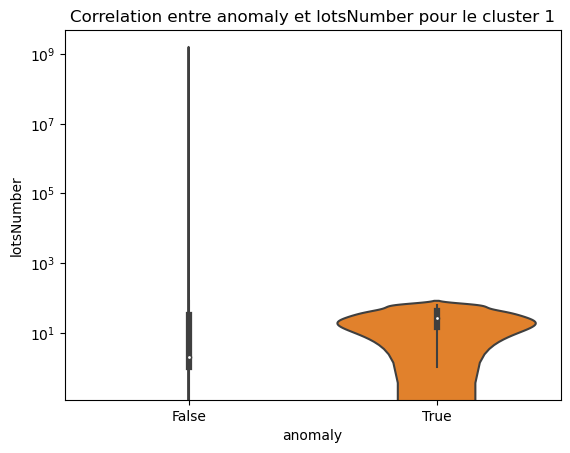

In [28]:
plot_categorial_numerical(
    data=cluster_1_data,
    title="Correlation entre anomaly et lotsNumber pour le cluster 1",
    xlabel='anomaly',
    ylabel='lotsNumber',
    saveas='../images/04_quest_lots_04.png',
    logy=True
)

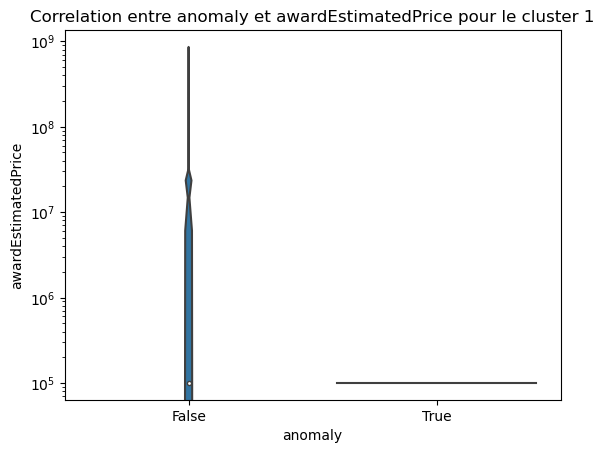

In [29]:
plot_categorial_numerical(
    data=cluster_1_data,
    title="Correlation entre anomaly et awardEstimatedPrice pour le cluster 1",
    xlabel='anomaly',
    ylabel='awardEstimatedPrice',
    saveas='../images/04_quest_lots_05.png',
    logy=True
)

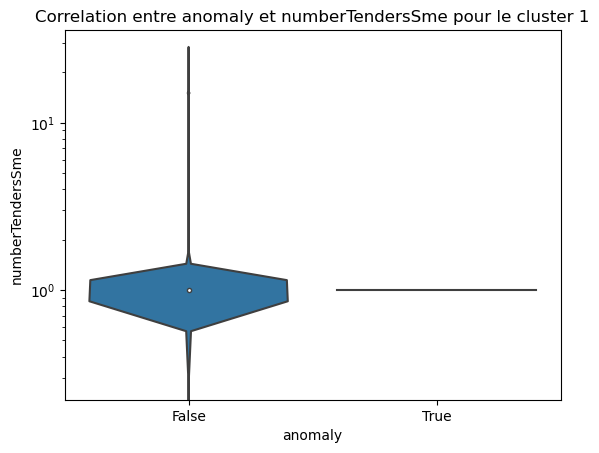

In [30]:
plot_categorial_numerical(
    data=cluster_1_data,
    title="Correlation entre anomaly et numberTendersSme pour le cluster 1",
    xlabel='anomaly',
    ylabel='numberTendersSme',
    saveas='../images/04_quest_lots_06.png',
    logy=True
)

In [31]:
cluster_3_anno_corr_cat, cluster_3_anno_corr_num = get_anomaly_corr(
    data = clusters_1_anomalies, 
    clusterId = 3, 
    num_cols = numeric_columns, 
    cat_cols = categorical_columns
)

In [32]:
cluster_3_anno_corr_cat

,anomaly
cancelled,0.000000
year,0.391611
cpv,0.844662
onBehalf,0.281347
jointProcurement,0.281347
fraAgreement,0.361905
fraEstimated,0.458453
accelerated,0.000000
outOfDirectives,0.000000
subContracted,0.057569


In [33]:
cluster_3_anno_corr_num

,anomaly
correctionsNb,0.000000e+00
awardEstimatedPrice,2.250228e-09
awardPrice,5.063076e-18
numberTenders,6.179505e-15
lotsNumber,1.109299e-07
numberTendersSme,4.758207e-05
contractDuration,6.402138e-01
publicityDuration,1.406268e-01


In [34]:
cluster_3_data = get_cluster_data(data=clusters_1_anomalies, clusterId=3)

In [35]:
cluster_3_data_vc = get_vc(cluster_3_data, column='cpv')

In [36]:
cluster_3_data_vc

,valeur,count,proportion
0,33140000.0,220,55.276382
1,79100000.0,48,12.060302
2,45215100.0,31,7.788945
3,15000000.0,29,7.286432
4,15800000.0,20,5.025126
5,92311000.0,9,2.261307
6,71250000.0,8,2.010050
7,71221000.0,8,2.010050
8,71000000.0,7,1.758794
9,18143000.0,5,1.256281


In [37]:
cluster_3_cpv_cat = discretize_values(
    df=cluster_3_data_vc.copy(), 
    column='count', 
    bins=[cluster_3_data_vc['count'].min(),5, 10,cluster_3_data_vc['count'].max()],
    labels = None, 
    include_lowest=True
)

In [38]:
cluster_3_cpv_cat

,valeur,count,proportion,category
0,33140000.0,220,55.276382,"(10.0, 220.0]"
1,79100000.0,48,12.060302,"(10.0, 220.0]"
2,45215100.0,31,7.788945,"(10.0, 220.0]"
3,15000000.0,29,7.286432,"(10.0, 220.0]"
4,15800000.0,20,5.025126,"(10.0, 220.0]"
5,92311000.0,9,2.261307,"(5.0, 10.0]"
6,71250000.0,8,2.010050,"(5.0, 10.0]"
7,71221000.0,8,2.010050,"(5.0, 10.0]"
8,71000000.0,7,1.758794,"(5.0, 10.0]"
9,18143000.0,5,1.256281,"(0.999, 5.0]"


In [40]:
cluster_3_cpv_corr_data = get_corr_cat_2_cat_data_many_y(
    df = cluster_3_data,
    df_cat = cluster_3_cpv_cat, 
    xcol = 'anomaly', 
    ycol = 'cpv'
)

In [41]:
cluster_3_cpv_corr_data

category,"(0.999, 5.0]","(5.0, 10.0]","(10.0, 220.0]"
anomaly,,,
False,3,14,332
True,15,18,16


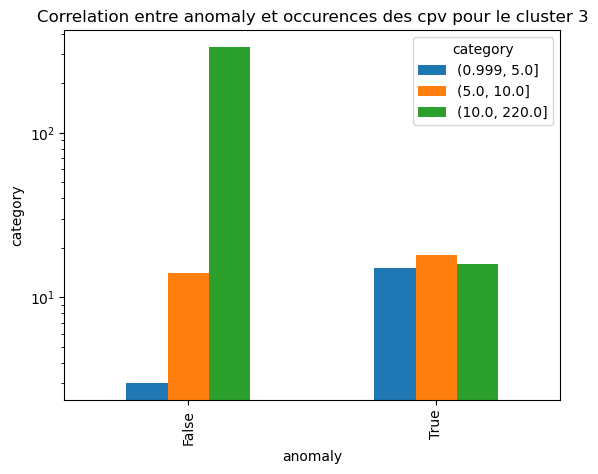

In [43]:
plot_categorial_categorical(
    data=cluster_3_cpv_corr_data,
    title="Correlation entre anomaly et occurences des cpv pour le cluster 3",
    xlabel="anomaly",
    ylabel="category",
    saveas='../images/04_quest_lots_07.png',
    logy=True
)

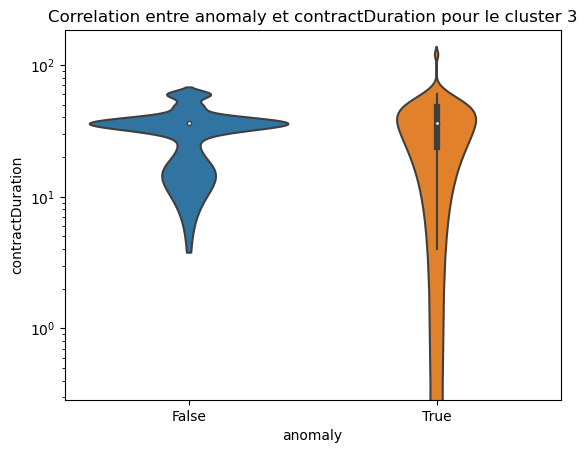

In [44]:
plot_categorial_numerical(
    data=cluster_3_data,
    title="Correlation entre anomaly et contractDuration pour le cluster 3",
    xlabel='anomaly',
    ylabel='contractDuration',
    saveas='../images/04_quest_lots_08.png',
    logy=True
)

In [45]:
cluster_4_anno_corr_cat, cluster_4_anno_corr_num = get_anomaly_corr(
    data = clusters_1_anomalies, 
    clusterId = 4, 
    num_cols = numeric_columns, 
    cat_cols = categorical_columns
)

In [46]:
cluster_4_anno_corr_cat

,anomaly
cancelled,0.000000
year,0.681231
cpv,1.000000
onBehalf,0.458836
jointProcurement,0.000000
fraAgreement,0.519458
fraEstimated,0.374665
accelerated,0.000000
outOfDirectives,0.000000
subContracted,0.000000


In [47]:
cluster_4_anno_corr_num

,anomaly
correctionsNb,0.000000
awardEstimatedPrice,0.037716
awardPrice,0.040304
numberTenders,0.065301
lotsNumber,0.004105
numberTendersSme,0.150562
contractDuration,0.000086
publicityDuration,0.000081


In [48]:
cluster_4_data = get_cluster_data(data=clusters_1_anomalies, clusterId=4)

In [49]:
cluster_4_data_vc = get_vc(cluster_4_data, column='cpv')

In [50]:
cluster_4_data_vc

,valeur,count,proportion
0,30200000.0,22,41.509434
1,90000000.0,9,16.981132
2,79400000.0,4,7.547170
3,32300000.0,4,7.547170
4,45112700.0,3,5.660377
5,79341000.0,3,5.660377
6,34928300.0,1,1.886792
7,71620000.0,1,1.886792
8,79340000.0,1,1.886792
9,30192000.0,1,1.886792


In [51]:
cluster_4_cpv_cat = discretize_values(
    df=cluster_4_data_vc.copy(), 
    column='count', 
    bins=[cluster_4_data_vc['count'].min(),5, 10,cluster_4_data_vc['count'].max()],
    labels = None, 
    include_lowest=True
)

In [52]:
cluster_4_cpv_cat

,valeur,count,proportion,category
0,30200000.0,22,41.509434,"(10.0, 22.0]"
1,90000000.0,9,16.981132,"(5.0, 10.0]"
2,79400000.0,4,7.547170,"(0.999, 5.0]"
3,32300000.0,4,7.547170,"(0.999, 5.0]"
4,45112700.0,3,5.660377,"(0.999, 5.0]"
5,79341000.0,3,5.660377,"(0.999, 5.0]"
6,34928300.0,1,1.886792,"(0.999, 5.0]"
7,71620000.0,1,1.886792,"(0.999, 5.0]"
8,79340000.0,1,1.886792,"(0.999, 5.0]"
9,30192000.0,1,1.886792,"(0.999, 5.0]"


In [53]:
cluster_4_cpv_corr_data = get_corr_cat_2_cat_data_many_y(
    df = cluster_4_data,
    df_cat = cluster_4_cpv_cat, 
    xcol = 'anomaly', 
    ycol = 'cpv'
)

In [54]:
cluster_4_cpv_corr_data

category,"(0.999, 5.0]","(5.0, 10.0]","(10.0, 22.0]"
anomaly,,,
False,10,9,22
True,12,0,0


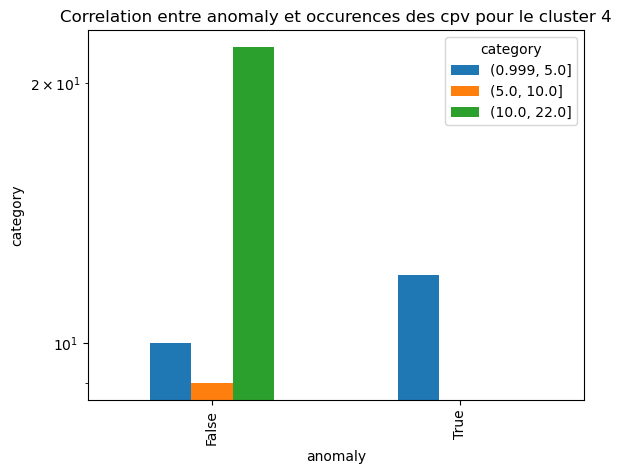

In [55]:
plot_categorial_categorical(
    data=cluster_4_cpv_corr_data,
    title="Correlation entre anomaly et occurences des cpv pour le cluster 4",
    xlabel="anomaly",
    ylabel="category",
    saveas='../images/04_quest_lots_09.png',
    logy=True
)

In [56]:
cluster_4_year_corr_data = get_corr_cat_2_cat_data(
    df = cluster_4_data, 
    xcol = 'anomaly', 
    ycol = 'year'
)

In [57]:
cluster_4_year_corr_data

year,2010,2011,2012,2013,2015,2017,2019,2020
anomaly,,,,,,,,
False,0,0,6,0,9,12,7,7
True,1,3,3,1,0,0,1,3


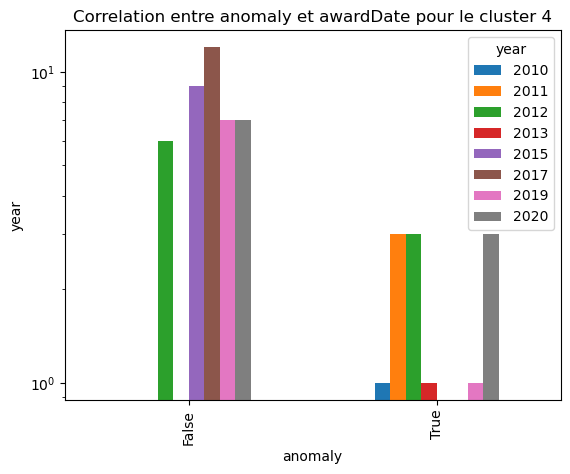

In [58]:
plot_categorial_categorical(
    data=cluster_4_year_corr_data,
    title="Correlation entre anomaly et awardDate pour le cluster 4",
    xlabel="anomaly",
    ylabel="year",
    saveas='../images/04_quest_lots_10.png',
    logy=True
)

# Question 6

Q6: y a-t-il des différences entre agents et lots issus de secteurs d’activité différents?

# Question 7

Q7: Si oui, lesquelles, et comment les interpréter?

# Question 8

Q8: y a-t-il des différences entre agents et lots issus de divisions administratives différentes?

# Question 9

Q9: Si oui, lesquelles, et comment les interpréter?

# Question 10

Q10:Y a-t-il un lien entre l’attribution d’un contrat et la distance spatiale séparant l’acheteur et le fournisseur remportant le marché?

# Question 11

Q11: Ou bien entre cette distance et le montant du contrat, voire une autre variable?

# Question 12

Q12: quelle est la part des PME dans la commande publique? Par secteur? Par type d’acheteur?